###  "Census Income" dataset.
## Prediction task is to determine whether a person makes over 50K a year. 
Predict whether income exceeds $50K/yr based on census data.
##### we can do by using clasiffication

In [1]:
# Importing libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Read CSV file into a pandas dataframe
data=pd.read_csv("adult.csv")

#take a look at the first few rows
data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [3]:
data.shape

(48842, 15)

In [4]:
data.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [6]:
data.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [7]:
data.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

### Here we see that we cannot get even a single missing value. But we can saw that  we have "?" in data  

#### Hence pandas can detect only standard Missing valuse only like "Nan ", "NA" and blank space.
Sometimes it might be the case where there’s missing values that have different formats.

## In this data set, there’s one missing values formats.
that is $ ?$.
So we have to detect that missing value

In [8]:
# Making a list of missing value types
missing_value= ["?"]
df = pd.read_csv("adult.csv", na_values = missing_value)
df.head(20)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
6,29,NaN,227026,HS-grad,9,Never-married,NaN,Unmarried,Black,Male,0,0,40,United-States,<=50K
7,63,Self-emp-not-inc,104626,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,>50K
8,24,Private,369667,Some-college,10,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States,<=50K
9,55,Private,104996,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,10,United-States,<=50K


In [9]:
df.isnull().sum()

age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64

### Hence we can saw that, we have some missing valuse in data frame in data set 

In [10]:
missing_ratio = np.round(df.isna().sum()/len(df)*100,2)
missing_ratio = pd.DataFrame(missing_ratio , columns=['Missing_Ratio'])
missing_ratio.sort_values('Missing_Ratio',ascending=False)

,Missing_Ratio
occupation,5.75
workclass,5.73
native-country,1.75
age,0.00
fnlwgt,0.00
education,0.00
educational-num,0.00
marital-status,0.00
relationship,0.00
race,0.00


The above information shows that the Missing Ratio for some variables
Since 'occupation' has a Missing Ratio of 5.75% , 'workclass' has a Missing Ratio of 5.73% and "native-country' has a Missing Ratio of 1.75%, we have to drop the Columns,
Other Columns can be treated
### the incomplete data in adult dataset are not too many, we  can remove them from our data set 


In [11]:
df=df.dropna()

In [12]:
df

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [13]:
df.shape

(45222, 15)

In [14]:
df.nunique()

age                   74
workclass              7
fnlwgt             26741
education             16
educational-num       16
marital-status         7
occupation            14
relationship           6
race                   5
gender                 2
capital-gain         121
capital-loss          97
hours-per-week        96
native-country        41
income                 2
dtype: int64

In [15]:
df.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,45222.000000,4.522200e+04,45222.000000,45222.000000,45222.000000,45222.000000
mean,38.547941,1.897347e+05,10.118460,1101.430344,88.595418,40.938017
std,13.217870,1.056392e+05,2.552881,7506.430084,404.956092,12.007508
min,17.000000,1.349200e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.173882e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783160e+05,10.000000,0.000000,0.000000,40.000000
75%,47.000000,2.379260e+05,13.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [16]:
df.describe(include='object')

,workclass,education,marital-status,occupation,relationship,race,gender,native-country,income
count,45222,45222,45222,45222,45222,45222,45222,45222,45222
unique,7,16,7,14,6,5,2,41,2
top,Private,HS-grad,Married-civ-spouse,Craft-repair,Husband,White,Male,United-States,<=50K
freq,33307,14783,21055,6020,18666,38903,30527,41292,34014


## Dropping columns that are not necessary
from the above information "education" and "educational-num" having the same unique values so we can remove one of them which is categorical "education" column

In [17]:
df.drop('education', axis=1, inplace=True)

In [18]:
df

,age,workclass,fnlwgt,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
5,34,Private,198693,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


## Getting Categorical and Numerical Columns

In [19]:
cat_cols = df.select_dtypes(include=['object'])
num_cols = df.select_dtypes(exclude=['object'])

In [20]:
 num_cols

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
0,25,226802,7,0,0,40
1,38,89814,9,0,0,50
2,28,336951,12,0,0,40
3,44,160323,10,7688,0,40
5,34,198693,6,0,0,30
...,...,...,...,...,...,...
48837,27,257302,12,0,0,38
48838,40,154374,9,0,0,40
48839,58,151910,9,0,0,40
48840,22,201490,9,0,0,20


In [21]:
 cat_cols

,workclass,marital-status,occupation,relationship,race,gender,native-country,income
0,Private,Never-married,Machine-op-inspct,Own-child,Black,Male,United-States,<=50K
1,Private,Married-civ-spouse,Farming-fishing,Husband,White,Male,United-States,<=50K
2,Local-gov,Married-civ-spouse,Protective-serv,Husband,White,Male,United-States,>50K
3,Private,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,United-States,>50K
5,Private,Never-married,Other-service,Not-in-family,White,Male,United-States,<=50K
...,...,...,...,...,...,...,...,...
48837,Private,Married-civ-spouse,Tech-support,Wife,White,Female,United-States,<=50K
48838,Private,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,United-States,>50K
48839,Private,Widowed,Adm-clerical,Unmarried,White,Female,United-States,<=50K
48840,Private,Never-married,Adm-clerical,Own-child,White,Male,United-States,<=50K


#### we have to conver categorical values to numerical valuse in data set


# Univariate Analysis

In [22]:
# to conver categorical to numaric
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

####  workclass - colunm

In [23]:
cat_cols.workclass.unique()

array(['Private', 'Local-gov', 'Self-emp-not-inc', 'Federal-gov',
       'State-gov', 'Self-emp-inc', 'Without-pay'], dtype=object)

In [24]:
cat_cols.workclass.value_counts()

Private             33307
Self-emp-not-inc     3796
Local-gov            3100
State-gov            1946
Self-emp-inc         1646
Federal-gov          1406
Without-pay            21
Name: workclass, dtype: int64

#### marital-status

In [25]:
cat_cols['marital-status'].unique()

array(['Never-married', 'Married-civ-spouse', 'Widowed', 'Separated',
       'Divorced', 'Married-spouse-absent', 'Married-AF-spouse'],
      dtype=object)

In [26]:
cat_cols['marital-status'].value_counts()

Married-civ-spouse       21055
Never-married            14598
Divorced                  6297
Separated                 1411
Widowed                   1277
Married-spouse-absent      552
Married-AF-spouse           32
Name: marital-status, dtype: int64

#### occupation

In [27]:
cat_cols.occupation.unique()

array(['Machine-op-inspct', 'Farming-fishing', 'Protective-serv',
       'Other-service', 'Prof-specialty', 'Craft-repair', 'Adm-clerical',
       'Exec-managerial', 'Tech-support', 'Sales', 'Priv-house-serv',
       'Transport-moving', 'Handlers-cleaners', 'Armed-Forces'],
      dtype=object)

In [28]:
cat_cols.occupation.value_counts()

Craft-repair         6020
Prof-specialty       6008
Exec-managerial      5984
Adm-clerical         5540
Sales                5408
Other-service        4808
Machine-op-inspct    2970
Transport-moving     2316
Handlers-cleaners    2046
Farming-fishing      1480
Tech-support         1420
Protective-serv       976
Priv-house-serv       232
Armed-Forces           14
Name: occupation, dtype: int64

#### relationship

In [29]:
cat_cols.relationship.unique()

array(['Own-child', 'Husband', 'Not-in-family', 'Unmarried', 'Wife',
       'Other-relative'], dtype=object)

In [30]:
cat_cols.relationship.value_counts()

Husband           18666
Not-in-family     11702
Own-child          6626
Unmarried          4788
Wife               2091
Other-relative     1349
Name: relationship, dtype: int64

#### race

In [31]:
cat_cols.race.unique()

array(['Black', 'White', 'Other', 'Amer-Indian-Eskimo',
       'Asian-Pac-Islander'], dtype=object)

In [32]:
cat_cols.race.value_counts()

White                 38903
Black                  4228
Asian-Pac-Islander     1303
Amer-Indian-Eskimo      435
Other                   353
Name: race, dtype: int64

#### gender	

In [33]:
cat_cols.gender.unique()

array(['Male', 'Female'], dtype=object)

In [34]:
cat_cols.gender.value_counts()

Male      30527
Female    14695
Name: gender, dtype: int64

#### native-country	

In [35]:
cat_cols['native-country'].unique()

array(['United-States', 'Peru', 'Guatemala', 'Mexico',
       'Dominican-Republic', 'Ireland', 'Germany', 'Philippines',
       'Thailand', 'Haiti', 'El-Salvador', 'Puerto-Rico', 'Vietnam',
       'South', 'Columbia', 'Japan', 'India', 'Cambodia', 'Poland',
       'Laos', 'England', 'Cuba', 'Taiwan', 'Italy', 'Canada', 'Portugal',
       'China', 'Nicaragua', 'Honduras', 'Iran', 'Scotland', 'Jamaica',
       'Ecuador', 'Yugoslavia', 'Hungary', 'Hong', 'Greece',
       'Trinadad&Tobago', 'Outlying-US(Guam-USVI-etc)', 'France',
       'Holand-Netherlands'], dtype=object)

In [36]:
cat_cols['native-country'].value_counts()

United-States                 41292
Mexico                          903
Philippines                     283
Germany                         193
Puerto-Rico                     175
Canada                          163
El-Salvador                     147
India                           147
Cuba                            133
England                         119
China                           113
Jamaica                         103
South                           101
Italy                           100
Dominican-Republic               97
Japan                            89
Guatemala                        86
Vietnam                          83
Columbia                         82
Poland                           81
Haiti                            69
Portugal                         62
Iran                             56
Taiwan                           55
Greece                           49
Nicaragua                        48
Peru                             45
Ecuador                     

#### income

In [37]:
cat_cols.income.unique()

array(['<=50K', '>50K'], dtype=object)

In [38]:
cat_cols.income.value_counts()

<=50K    34014
>50K     11208
Name: income, dtype: int64

In [39]:
for i in cat_cols:

    df[i] = label_encoder.fit_transform(df[i])

print("Label Encoded Data: ")

Label Encoded Data: 


In [40]:
df

,age,workclass,fnlwgt,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,2,226802,7,4,6,3,2,1,0,0,40,38,0
1,38,2,89814,9,2,4,0,4,1,0,0,50,38,0
2,28,1,336951,12,2,10,0,4,1,0,0,40,38,1
3,44,2,160323,10,2,6,0,2,1,7688,0,40,38,1
5,34,2,198693,6,4,7,1,4,1,0,0,30,38,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,2,257302,12,2,12,5,4,0,0,0,38,38,0
48838,40,2,154374,9,2,6,0,4,1,0,0,40,38,1
48839,58,2,151910,9,6,0,4,4,0,0,0,40,38,0
48840,22,2,201490,9,4,0,3,4,1,0,0,20,38,0


In [41]:
df.describe()

,age,workclass,fnlwgt,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
count,45222.000000,45222.000000,4.522200e+04,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000
mean,38.547941,2.204502,1.897347e+05,10.118460,2.585180,5.969572,1.412697,3.680288,0.675048,1101.430344,88.595418,40.938017,36.401022,0.247844
std,13.217870,0.958122,1.056392e+05,2.552881,1.500458,4.026400,1.597227,0.832353,0.468362,7506.430084,404.956092,12.007508,6.079856,0.431766
min,17.000000,0.000000,1.349200e+04,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,28.000000,2.000000,1.173882e+05,9.000000,2.000000,2.000000,0.000000,4.000000,0.000000,0.000000,0.000000,40.000000,38.000000,0.000000
50%,37.000000,2.000000,1.783160e+05,10.000000,2.000000,6.000000,1.000000,4.000000,1.000000,0.000000,0.000000,40.000000,38.000000,0.000000
75%,47.000000,2.000000,2.379260e+05,13.000000,4.000000,9.000000,3.000000,4.000000,1.000000,0.000000,0.000000,45.000000,38.000000,0.000000
max,90.000000,6.000000,1.490400e+06,16.000000,6.000000,13.000000,5.000000,4.000000,1.000000,99999.000000,4356.000000,99.000000,40.000000,1.000000


## distribution plots

#### Boxplots:

In [42]:
X = df.drop('income', axis=1)
Y = df['income']

In [43]:
X_normal = (X-X.mean())/X.std()
X_normal.head()

,age,workclass,fnlwgt,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country
0,-1.024972,-0.213441,0.350886,-1.221545,0.942926,0.007557,0.993787,-2.018722,0.693806,-0.146732,-0.218778,-0.078119,0.262996
1,-0.041455,-0.213441,-0.945868,-0.438117,-0.390001,-0.489165,-0.884469,0.384106,0.693806,-0.146732,-0.218778,0.754693,0.262996
2,-0.798006,-1.257149,1.393576,0.737026,-0.390001,1.001000,-0.884469,0.384106,0.693806,-0.146732,-0.218778,-0.078119,0.262996
3,0.412476,-0.213441,-0.278417,-0.046402,-0.390001,0.007557,-0.884469,-2.018722,0.693806,0.877457,-0.218778,-0.078119,0.262996
5,-0.344075,-0.213441,0.084801,-1.613260,0.942926,0.255918,-0.258384,0.384106,0.693806,-0.146732,-0.218778,-0.910931,0.262996


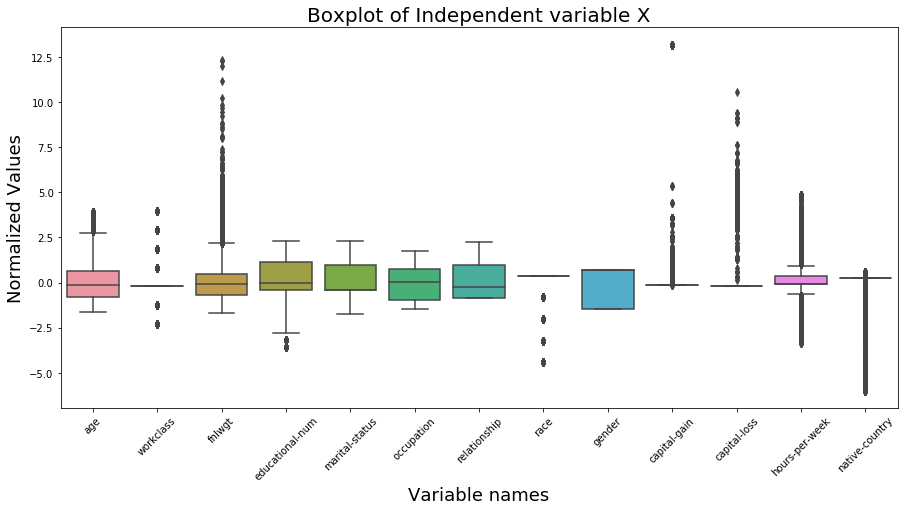

In [44]:
plt.figure(figsize=(15,7))
ax = sns.boxplot(data=X_normal)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)
plt.rc('ytick', labelsize=16)
plt.rc('xtick', labelsize=16)
plt.title('Boxplot of Independent variable X', fontsize=20)
plt.ylabel('Normalized Values', fontsize=18)
_ = plt.xlabel('Variable names', fontsize=18)

# Handeling Numerical columns 

### PDF 
age

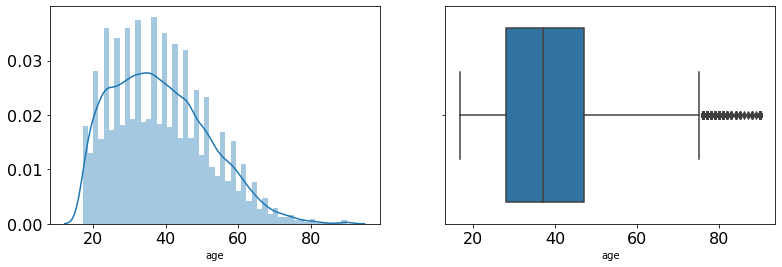

Skewness =  0.5328158942555791


In [45]:
fig,ax=plt.subplots(1,2,figsize=(13,4))

sns.distplot(df['age'], ax=ax[0])
sns.boxplot(df['age'], ax=ax[1])
age_skew = df['age'].skew()
plt.show()
print('Skewness = ',age_skew)

The above distribution plot shows the significant Positive Skewness has been acceptable level

Distribution of age


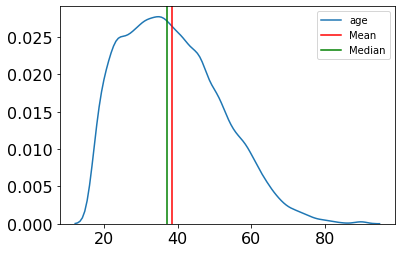

In [46]:
print('Distribution of age')
sns.kdeplot(df['age'].dropna())
plt.axvline(df['age'].mean(), color='r')
plt.axvline(df['age'].median(), color='g')

plt.legend(['age','Mean','Median'])
plt.show()

In [47]:
 num_cols

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
0,25,226802,7,0,0,40
1,38,89814,9,0,0,50
2,28,336951,12,0,0,40
3,44,160323,10,7688,0,40
5,34,198693,6,0,0,30
...,...,...,...,...,...,...
48837,27,257302,12,0,0,38
48838,40,154374,9,0,0,40
48839,58,151910,9,0,0,40
48840,22,201490,9,0,0,20


#### fnlwgt

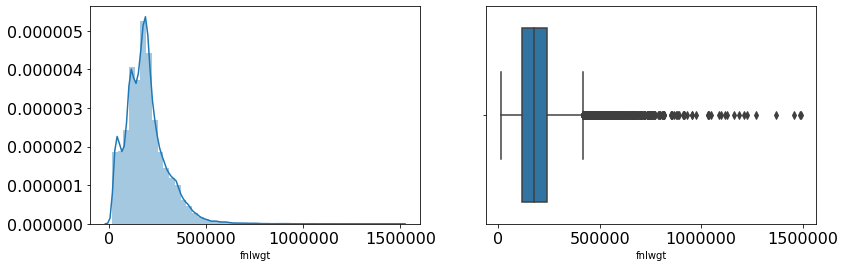

Skewness =  1.447515552609532


In [48]:
fig,ax=plt.subplots(1,2,figsize=(13,4))

sns.distplot(df['fnlwgt'], ax=ax[0])
sns.boxplot(df['fnlwgt'], ax=ax[1])
fnlwgt_skew = df['fnlwgt'].skew()
plt.show()
print('Skewness = ',fnlwgt_skew)

The above distribution plot shows that 'fnlwgt' values are significantly Right Skewed(Positively Skewed)
and the box plot shows that there are significant amount of outliers

#### Removing Outliers
we can calculate the upper limit using IQR(Inter Quartile Range) and
consider values outside upper limit as outliers and remove them

In [49]:
df['fnlwgt'].describe()

count    4.522200e+04
mean     1.897347e+05
std      1.056392e+05
min      1.349200e+04
25%      1.173882e+05
50%      1.783160e+05
75%      2.379260e+05
max      1.490400e+06
Name: fnlwgt, dtype: float64

In [50]:
Q1=df['fnlwgt'].quantile(0.25)
Q3=df['fnlwgt'].quantile(0.75)
IQR=Q3-Q1
df=df[~((df['fnlwgt']<(Q1-1.5*IQR))|(df['fnlwgt']>(Q3+1.5*IQR)))]

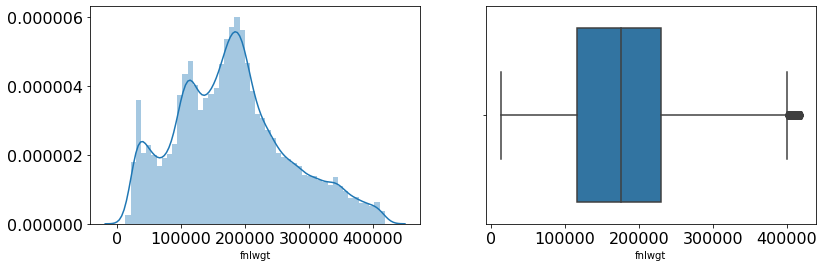

Skewness =  0.41981721191980326


In [51]:
fig,ax=plt.subplots(1,2,figsize=(13,4))

sns.distplot(df['fnlwgt'], ax=ax[0])
sns.boxplot(df['fnlwgt'], ax=ax[1])
fnlwgt_skew = df['fnlwgt'].skew()
plt.show()
print('Skewness = ',fnlwgt_skew)

The above distribution plot shows the significant Positive Skewness has been reduced to acceptable level

Distribution of fnlwgt


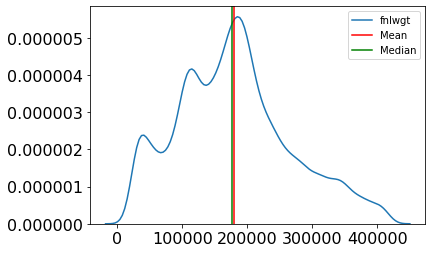

In [52]:
print('Distribution of fnlwgt')
sns.kdeplot(df['fnlwgt'].dropna())
plt.axvline(df['fnlwgt'].mean(), color='r')
plt.axvline(df['fnlwgt'].median(), color='g')

plt.legend(['fnlwgt','Mean','Median'])
plt.show()

In [53]:
df

,age,workclass,fnlwgt,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,2,226802,7,4,6,3,2,1,0,0,40,38,0
1,38,2,89814,9,2,4,0,4,1,0,0,50,38,0
2,28,1,336951,12,2,10,0,4,1,0,0,40,38,1
3,44,2,160323,10,2,6,0,2,1,7688,0,40,38,1
5,34,2,198693,6,4,7,1,4,1,0,0,30,38,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,2,257302,12,2,12,5,4,0,0,0,38,38,0
48838,40,2,154374,9,2,6,0,4,1,0,0,40,38,1
48839,58,2,151910,9,6,0,4,4,0,0,0,40,38,0
48840,22,2,201490,9,4,0,3,4,1,0,0,20,38,0


#### educational-num

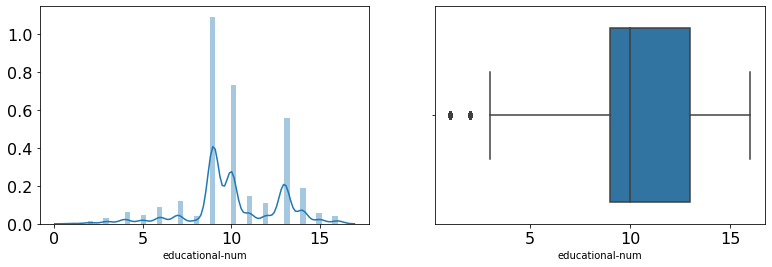

Skewness =  -0.30171742174652216


In [54]:
fig,ax=plt.subplots(1,2,figsize=(13,4))

sns.distplot(df['educational-num'], ax=ax[0])
sns.boxplot(df['educational-num'], ax=ax[1])
educational_skew = df['educational-num'].skew()
plt.show()
print('Skewness = ',educational_skew)

The above distribution plot shows the significant negative Skewness has been reduced to acceptable level

Distribution of educational-num


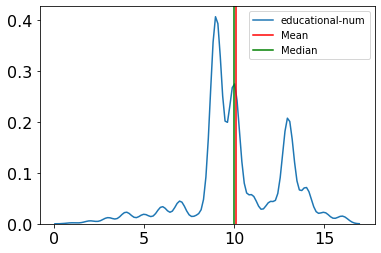

In [55]:
print('Distribution of educational-num')
sns.kdeplot(df['educational-num'].dropna())
plt.axvline(df['educational-num'].mean(), color='r')
plt.axvline(df['educational-num'].median(), color='g')

plt.legend(['educational-num','Mean','Median'])
plt.show()

#### capital-gain

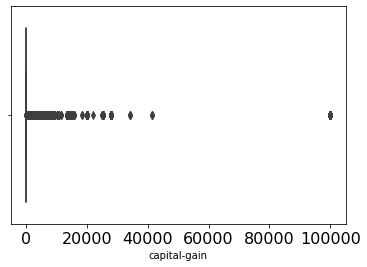

Skewness =  11.809939690572982


In [56]:

sns.boxplot(df['capital-gain'])
capital_skew = df['capital-gain'].skew()
plt.show()
print('Skewness = ',capital_skew)

The above distribution plot shows that 'capital-gain' values are Cannot estiamte density and the box plot shows that there are significant amount of outliers

In [57]:
Q1=df['capital-gain'].quantile(0.25)
Q3=df['capital-gain'].quantile(0.96)
IQR=Q3-Q1
df=df[~((df['capital-gain']<(Q1-1.5*IQR))|(df['capital-gain']>(Q3+1.5*IQR)))]

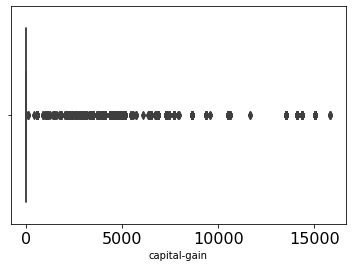

Skewness =  4.956769055150692


In [58]:
sns.boxplot(df['capital-gain'])
capital_skew = df['capital-gain'].skew()
plt.show()
print('Skewness = ',capital_skew)

In [59]:
df

,age,workclass,fnlwgt,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,2,226802,7,4,6,3,2,1,0,0,40,38,0
1,38,2,89814,9,2,4,0,4,1,0,0,50,38,0
2,28,1,336951,12,2,10,0,4,1,0,0,40,38,1
3,44,2,160323,10,2,6,0,2,1,7688,0,40,38,1
5,34,2,198693,6,4,7,1,4,1,0,0,30,38,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,2,257302,12,2,12,5,4,0,0,0,38,38,0
48838,40,2,154374,9,2,6,0,4,1,0,0,40,38,1
48839,58,2,151910,9,6,0,4,4,0,0,0,40,38,0
48840,22,2,201490,9,4,0,3,4,1,0,0,20,38,0


The above distribution plot shows the significant Positive Skewness has been reduced to acceptable level
###### if we remove the more outliers then we loos lots of data so we are continuing with this much of outliers
#### capital-loss	

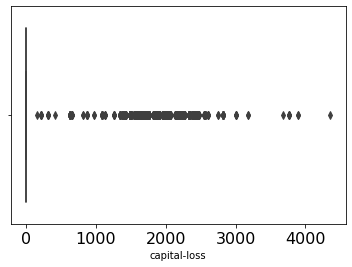

Skewness =  4.4712431336356255


In [60]:
sns.boxplot(df['capital-loss'])
capital_skew = df['capital-loss'].skew()
plt.show()
print('Skewness = ',capital_skew)


If we remove the more outliers then we loos lots of data so we are continuing with this much of outliers

#### hours-per-week

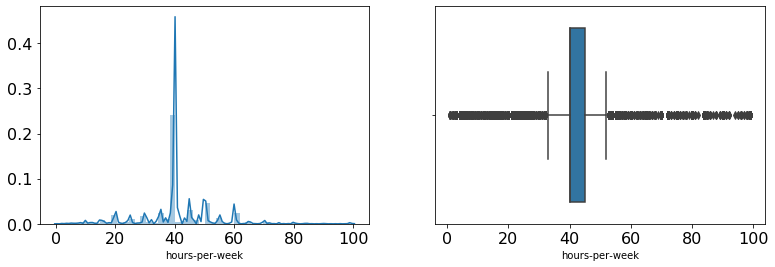

Skewness =  0.3416686995820531


In [61]:
fig,ax=plt.subplots(1,2,figsize=(13,4))

sns.distplot(df['hours-per-week'], ax=ax[0])
sns.boxplot(df['hours-per-week'], ax=ax[1])
hours_skew = df['hours-per-week'].skew()
plt.show()
print('Skewness = ',hours_skew)

The above distribution plot shows the significant Positive and nagative Skewness has been acceptable level

#### Countplots

In [62]:
df['workclass'].value_counts()

2    32098
4     3652
1     3020
5     1876
3     1534
0     1345
6       21
Name: workclass, dtype: int64

Text(0.5, 1.0, 'working workclass of employees ')

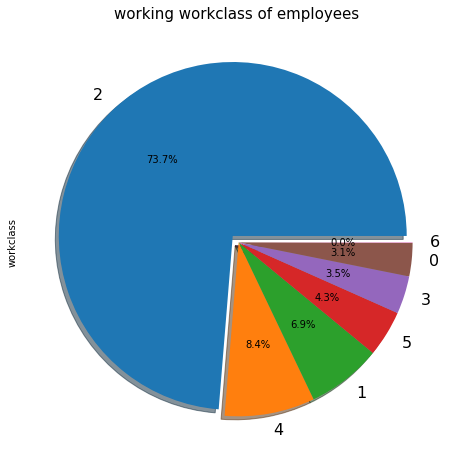

In [63]:
plt.figure(figsize=(18,8))
cat=df['workclass'].value_counts()

theme=plt.get_cmap('hsv')
cat.plot.pie(autopct="%1.1f%%", shadow=True, explode=(0.05, 0, 0, 0, 0, 0, 0))
plt.title('working workclass of employees ', fontsize=15)

In [64]:
df['age'].value_counts()

36    1238
35    1237
31    1227
33    1227
37    1183
      ... 
85       5
88       5
86       1
87       1
89       1
Name: age, Length: 74, dtype: int64

Text(0.5, 1.0, 'age of employees ')

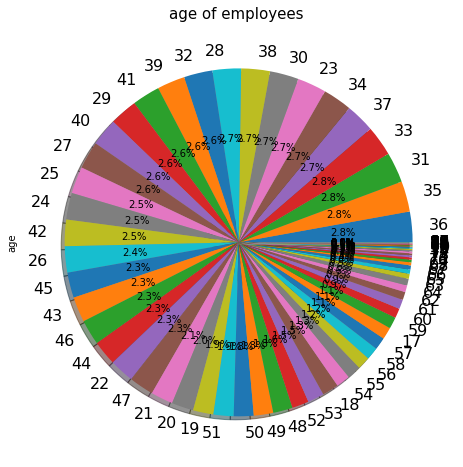

In [65]:
plt.figure(figsize=(18,8))
cat=df['age'].value_counts()

theme=plt.get_cmap('hsv')
cat.plot.pie(autopct="%1.1f%%", shadow=True)
plt.title('age of employees ', fontsize=15)

In [66]:
df.nunique()

age                   74
workclass              7
fnlwgt             25553
educational-num       16
marital-status         7
occupation            14
relationship           6
race                   5
gender                 2
capital-gain         112
capital-loss          97
hours-per-week        96
native-country        41
income                 2
dtype: int64

Text(0.5, 1.0, 'marital-status of employees ')

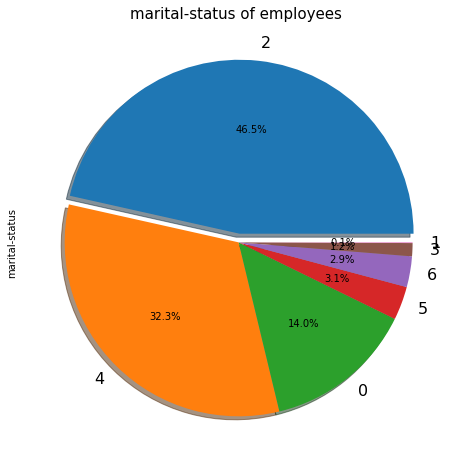

In [67]:
plt.figure(figsize=(18,8))
cat=df['marital-status'].value_counts()

theme=plt.get_cmap('hsv')
cat.plot.pie(autopct="%1.1f%%", shadow=True, explode=(0.05, 0, 0, 0, 0, 0, 0))
plt.title('marital-status of employees ', fontsize=15)

Text(0.5, 1.0, 'educational-num of employees ')

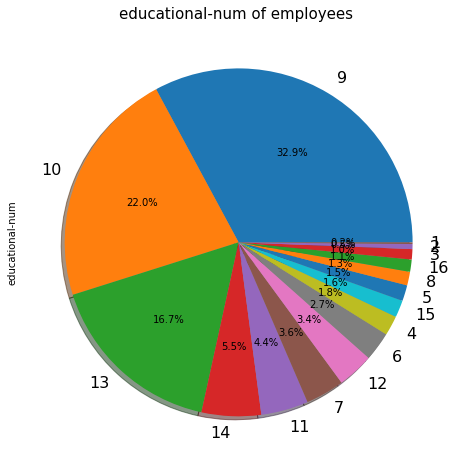

In [68]:
plt.figure(figsize=(18,8))
cat=df['educational-num'].value_counts()

theme=plt.get_cmap('hsv')
cat.plot.pie(autopct="%1.1f%%", shadow=True)
plt.title('educational-num of employees ', fontsize=15)

Text(0.5, 1.0, 'occupation of employees ')

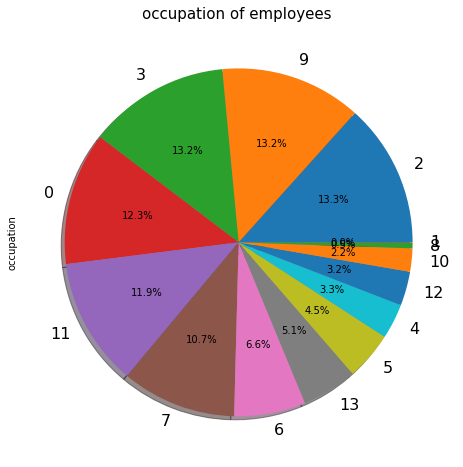

In [69]:
plt.figure(figsize=(18,8))
cat=df['occupation'].value_counts()

theme=plt.get_cmap('hsv')
cat.plot.pie(autopct="%1.1f%%", shadow=True)
plt.title('occupation of employees ', fontsize=15)

Text(0.5, 1.0, 'relationship of employees ')

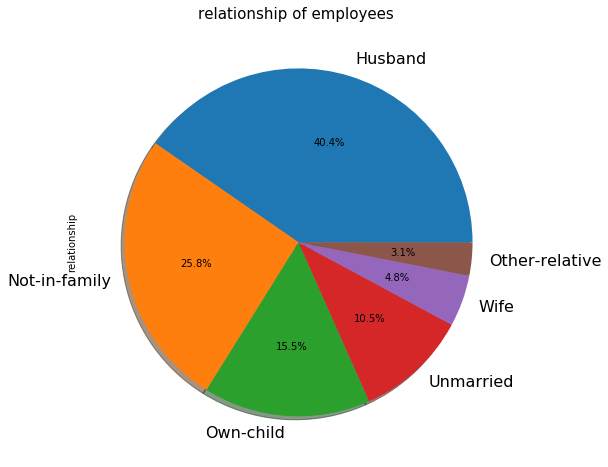

In [70]:
plt.figure(figsize=(18,8))
cat=data['relationship'].value_counts()

theme=plt.get_cmap('hsv')
cat.plot.pie(autopct="%1.1f%%", shadow=True)
plt.title('relationship of employees ', fontsize=15)


## Bivariate Analysis

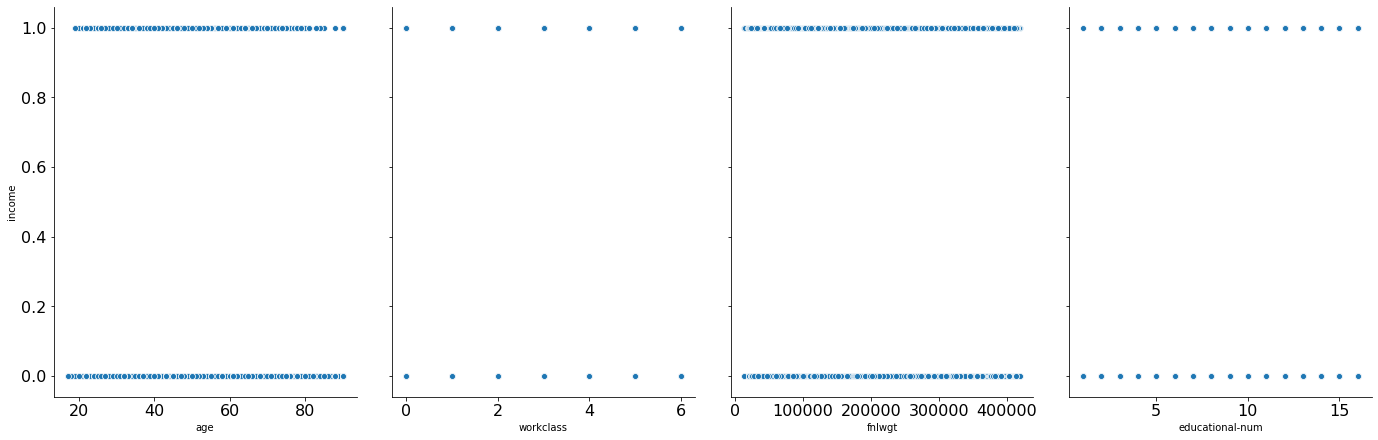

In [71]:
sns.pairplot(df, x_vars=['age','workclass','fnlwgt','educational-num'], y_vars=['income'], size=6, aspect=0.8)

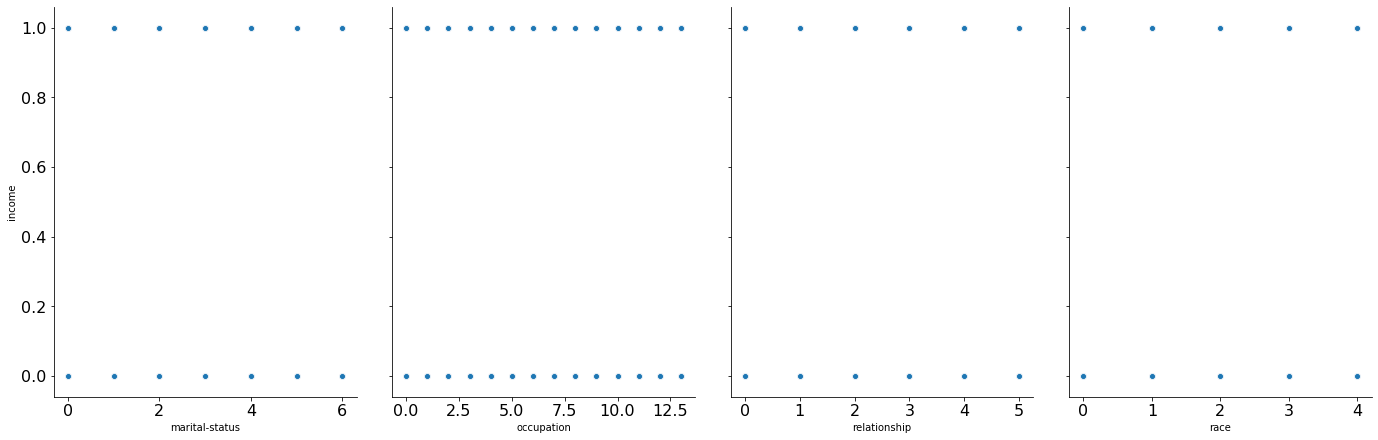

In [72]:
 sns.pairplot(df, x_vars=['marital-status','occupation','relationship','race'], y_vars=['income'], size=6, aspect=0.8)

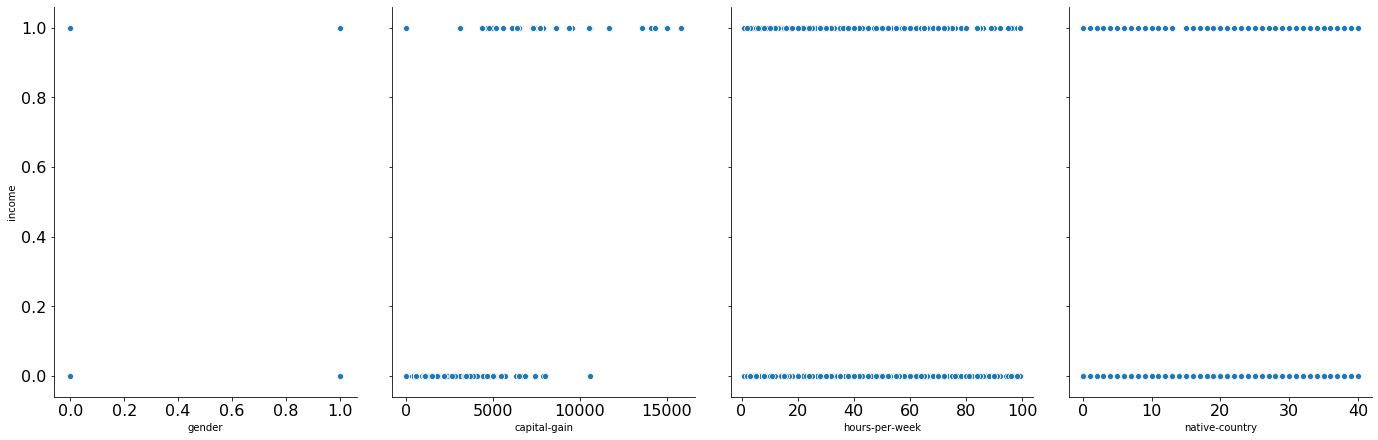

In [73]:
sns.pairplot(df, x_vars=['gender','capital-gain','hours-per-week','native-country'], y_vars=['income'], size=6, aspect=0.8)

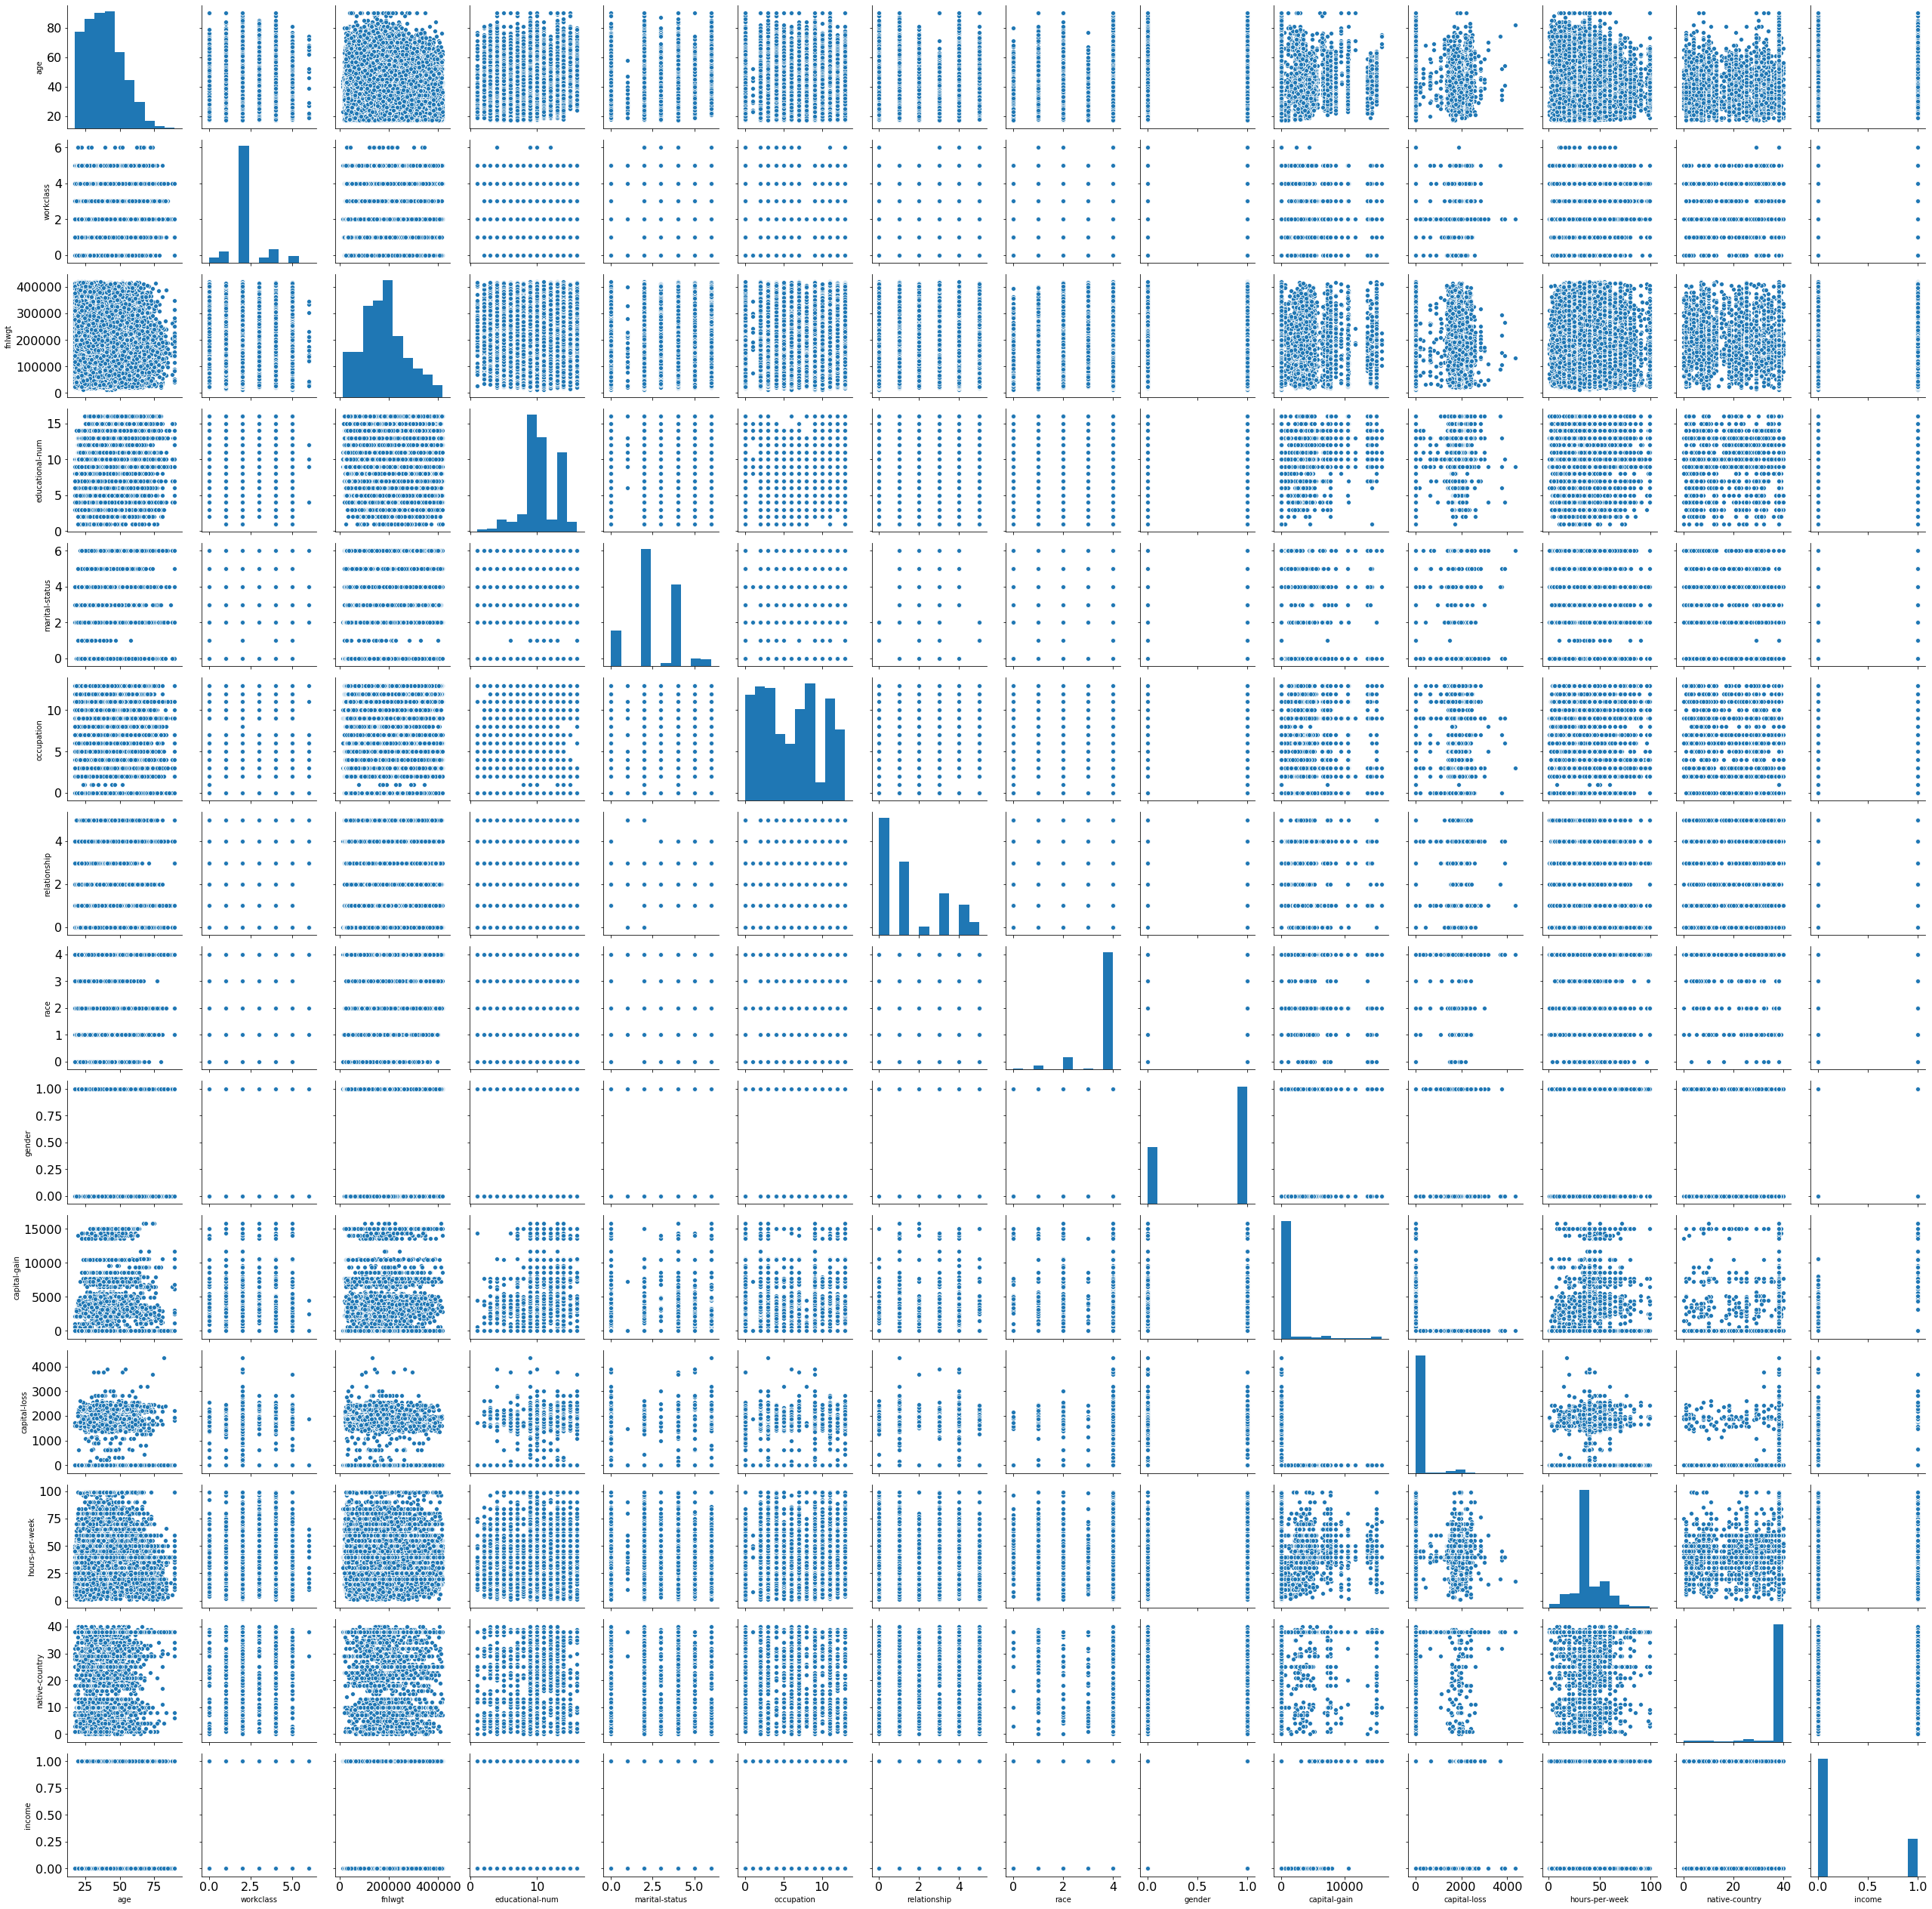

In [74]:
sns.pairplot(df)

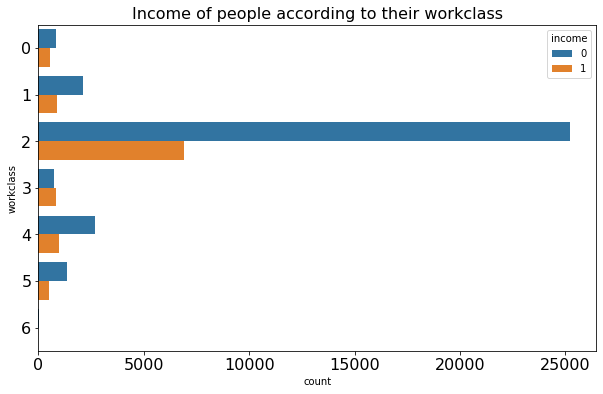

In [75]:
plt.figure(figsize = (10,6))
plt.title("Income of people according to their workclass", fontsize = 16)
sns.countplot(y = df['workclass'], hue = df['income'])
plt.show()

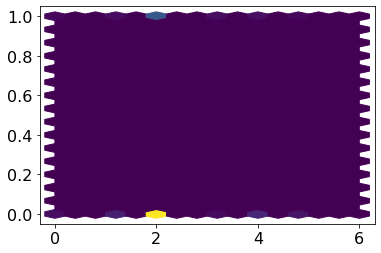

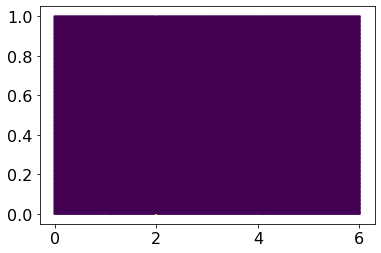

In [76]:
# Make the plot
plt.hexbin(x=df['workclass'], y=df['income'], gridsize=(15,15) )
plt.show()
 
# We can control the size of the bins:
plt.hexbin(x=df['workclass'], y=df['income'], gridsize=(150,150) )
plt.show()

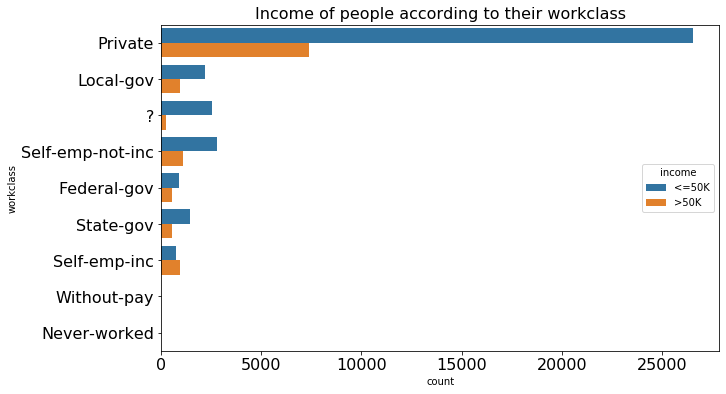

In [77]:
plt.figure(figsize = (10,6))
plt.title("Income of people according to their workclass", fontsize = 16)
sns.countplot(y = data['workclass'], hue = data['income'])
plt.show()

We see that the majority of people who have income more than 50K a year are from private sector. 

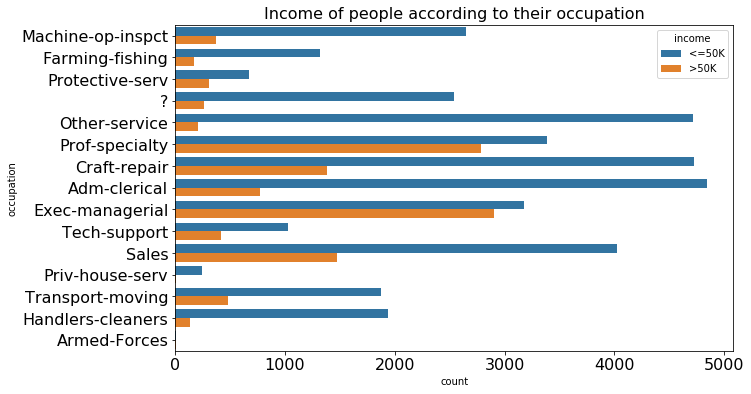

In [78]:
plt.figure(figsize = (10,6))
plt.title("Income of people according to their occupation", fontsize = 16)
sns.countplot(y = data['occupation'], hue = data['income'])
plt.show()

Majority of people whose income is greater than 50K are either executive managers or they belong to any professional speciality

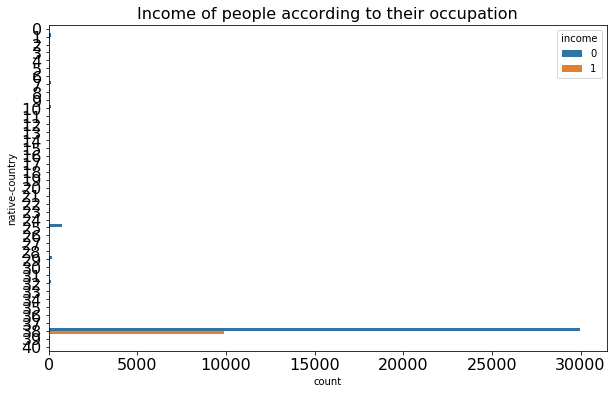

In [79]:
plt.figure(figsize = (10,6))
plt.title("Income of people according to their occupation", fontsize = 16)
sns.countplot(y = df['native-country'], hue = df['income'])
plt.show()

Majority of people with higher income belong to the USA.

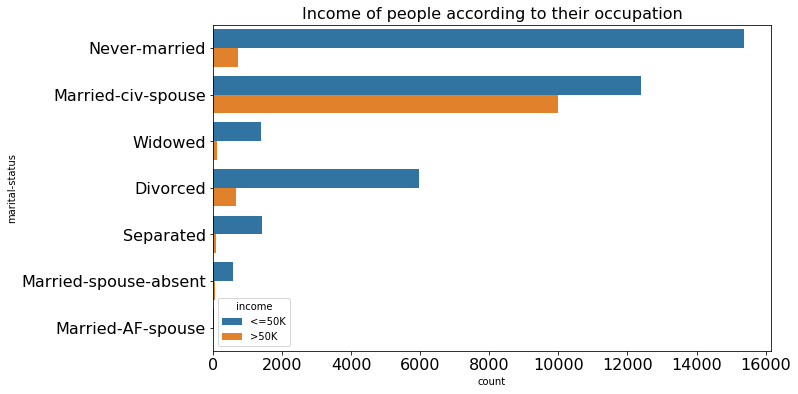

In [80]:
plt.figure(figsize = (10,6))
plt.title("Income of people according to their occupation", fontsize = 16)
sns.countplot(y = data['marital-status'], hue = data['income'])
plt.show()

Married people have a higher income as compared to others.

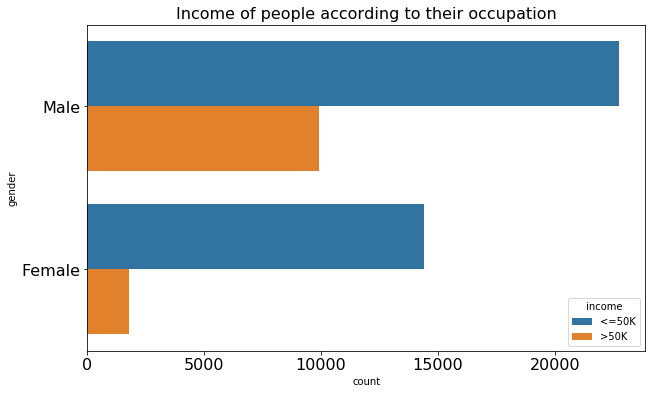

In [81]:
plt.figure(figsize = (10,6))
plt.title("Income of people according to their occupation", fontsize = 16)
sns.countplot(y = data['gender'], hue = data['income'])
plt.show()

We can see that male have more salary than female.

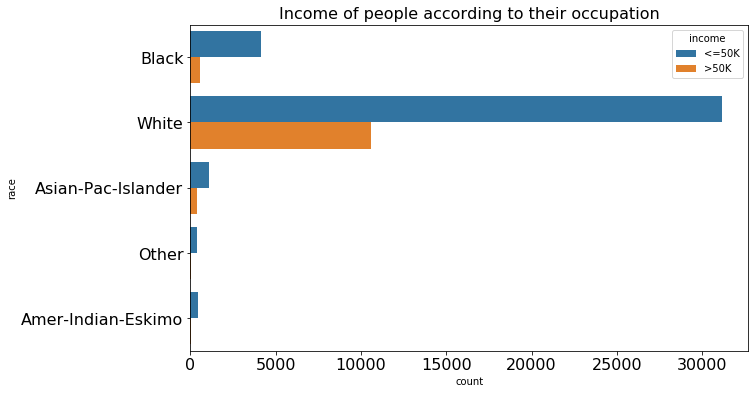

In [82]:
plt.figure(figsize = (10,6))
plt.title("Income of people according to their occupation", fontsize = 16)
sns.countplot(y = data['race'], hue = data['income'])
plt.show()

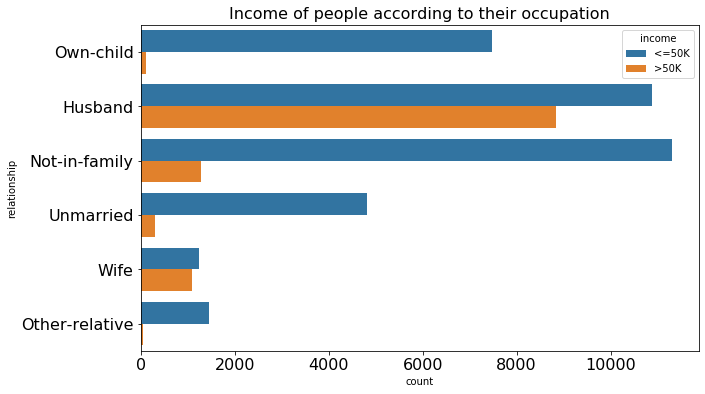

In [83]:
plt.figure(figsize = (10,6))
plt.title("Income of people according to their occupation", fontsize = 16)
sns.countplot(y = data['relationship'], hue = data['income'])
plt.show()

## Correlation

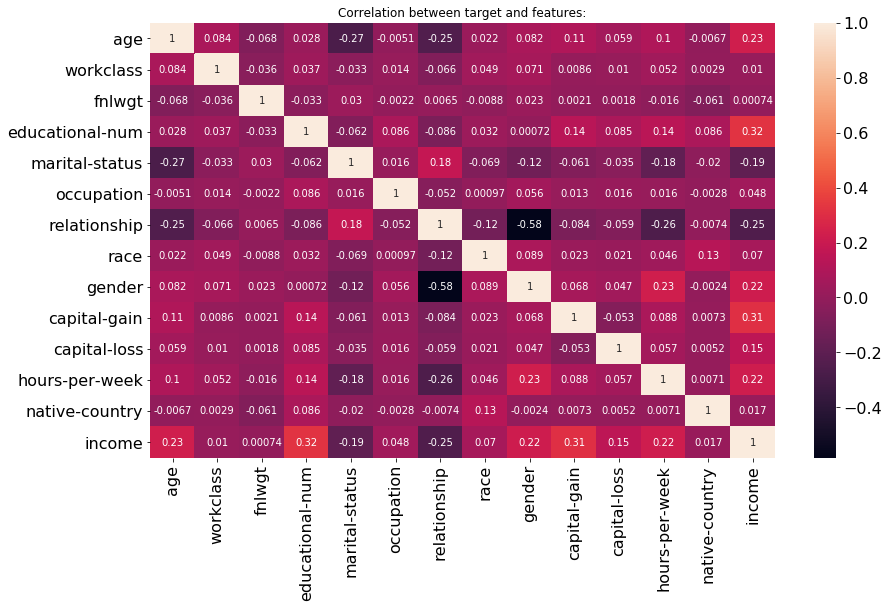

In [84]:
plt.figure(figsize = (14, 8))
plt.title("Correlation between target and features:")
sns.heatmap(df.corr(), annot = True)
plt.show()

In [85]:
cor = df.corr()
#Correlation with output variable
cor_target = abs(cor["income"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.01]
relevant_features

age                0.229192
workclass          0.010129
educational-num    0.323623
marital-status     0.190772
occupation         0.047845
relationship       0.252595
race               0.069598
gender             0.216130
capital-gain       0.310923
capital-loss       0.154818
hours-per-week     0.222638
native-country     0.017128
income             1.000000
Name: income, dtype: float64

In [86]:
matrix_correlation = df.corr(method='pearson')
correlation_target = matrix_correlation.values[ -1, : -1]
index_opp =  abs(correlation_target[ : ]).argsort()[ : : -1]
dicc = {}
for name, correlation in zip( X.columns[index_opp], list(correlation_target[index_opp] ) ):
    dicc[name] = correlation
pd.DataFrame.from_dict(dicc, orient='index', columns=['Correlation with target Income'])

,Correlation with target Income
educational-num,0.323623
capital-gain,0.310923
relationship,-0.252595
age,0.229192
hours-per-week,0.222638
gender,0.216130
marital-status,-0.190772
capital-loss,0.154818
race,0.069598
occupation,0.047845


In [87]:
df

,age,workclass,fnlwgt,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,2,226802,7,4,6,3,2,1,0,0,40,38,0
1,38,2,89814,9,2,4,0,4,1,0,0,50,38,0
2,28,1,336951,12,2,10,0,4,1,0,0,40,38,1
3,44,2,160323,10,2,6,0,2,1,7688,0,40,38,1
5,34,2,198693,6,4,7,1,4,1,0,0,30,38,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,2,257302,12,2,12,5,4,0,0,0,38,38,0
48838,40,2,154374,9,2,6,0,4,1,0,0,40,38,1
48839,58,2,151910,9,6,0,4,4,0,0,0,40,38,0
48840,22,2,201490,9,4,0,3,4,1,0,0,20,38,0


In [88]:
df['income'].value_counts()

0    32966
1    10580
Name: income, dtype: int64

## Data standardization


In [89]:
from sklearn import preprocessing
from sklearn.preprocessing import RobustScaler

trans = RobustScaler()
robust_df = trans.fit_transform(df)

df

,age,workclass,fnlwgt,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,2,226802,7,4,6,3,2,1,0,0,40,38,0
1,38,2,89814,9,2,4,0,4,1,0,0,50,38,0
2,28,1,336951,12,2,10,0,4,1,0,0,40,38,1
3,44,2,160323,10,2,6,0,2,1,7688,0,40,38,1
5,34,2,198693,6,4,7,1,4,1,0,0,30,38,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,2,257302,12,2,12,5,4,0,0,0,38,38,0
48838,40,2,154374,9,2,6,0,4,1,0,0,40,38,1
48839,58,2,151910,9,6,0,4,4,0,0,0,40,38,0
48840,22,2,201490,9,4,0,3,4,1,0,0,20,38,0


In [90]:
from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler()
df.loc[:,'age':'hours-per-week'] = scale.fit_transform(df.loc[:,'age':'hours-per-week'])
df

,age,workclass,fnlwgt,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,0.109589,0.333333,0.526418,0.400000,0.666667,0.461538,0.6,0.5,1.0,0.000000,0.0,0.397959,38,0
1,0.287671,0.333333,0.188352,0.533333,0.333333,0.307692,0.0,1.0,1.0,0.000000,0.0,0.500000,38,0
2,0.150685,0.166667,0.798250,0.733333,0.333333,0.769231,0.0,1.0,1.0,0.000000,0.0,0.397959,38,1
3,0.369863,0.333333,0.362358,0.600000,0.333333,0.461538,0.0,0.5,1.0,0.485629,0.0,0.397959,38,1
5,0.232877,0.333333,0.457049,0.333333,0.666667,0.538462,0.2,1.0,1.0,0.000000,0.0,0.295918,38,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,0.136986,0.333333,0.601688,0.733333,0.333333,0.923077,1.0,1.0,0.0,0.000000,0.0,0.377551,38,0
48838,0.315068,0.333333,0.347677,0.533333,0.333333,0.461538,0.0,1.0,1.0,0.000000,0.0,0.397959,38,1
48839,0.561644,0.333333,0.341596,0.533333,1.000000,0.000000,0.8,1.0,0.0,0.000000,0.0,0.397959,38,0
48840,0.068493,0.333333,0.463952,0.533333,0.666667,0.000000,0.6,1.0,1.0,0.000000,0.0,0.193878,38,0


# Model Building

In [91]:
from sklearn.model_selection import train_test_split
# Train and Test Split
x = df.drop('income', axis=1)
y = df['income']
train_set,test_set = train_test_split(df,test_size=0.30,random_state=0)

In [92]:
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.30, random_state=0)

# Logistic Regression

In [93]:
 #importing logistic regression 
from sklearn.linear_model import LogisticRegression

In [94]:
log_r= LogisticRegression()
log_r.fit(X_train,y_train)

LogisticRegression()

In [95]:
import statsmodels.api as sm
model = sm.Logit(y_train, X_train)
result = model.fit()

Optimization terminated successfully.
         Current function value: 0.421579
         Iterations 7


In [96]:
print(result.summary())

                           Logit Regression Results                           
Dep. Variable:                 income   No. Observations:                30482
Model:                          Logit   Df Residuals:                    30469
Method:                           MLE   Df Model:                           12
Date:                Sun, 30 May 2021   Pseudo R-squ.:                  0.2389
Time:                        23:02:20   Log-Likelihood:                -12851.
converged:                       True   LL-Null:                       -16883.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
age                 1.3105      0.094     13.925      0.000       1.126       1.495
workclass          -1.4728      0.096    -15.365      0.000      -1.661      -1.285
fnlwgt             -0.4652      

In [97]:
predictions = log_r.predict(X_train)
from sklearn.metrics import accuracy_score
score =accuracy_score(y_train,predictions)

In [98]:
score*100

81.75316580276885

In [99]:
pred_lg = log_r.predict(X_test)
print("Accuracy Score of Logistic Regression model is", accuracy_score(y_test, pred_lg)*100)

Accuracy Score of Logistic Regression model is 81.99632578077158


In [100]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, pred_lg)
cnf_matrix

array([[9288,  586],
       [1766, 1424]], dtype=int64)

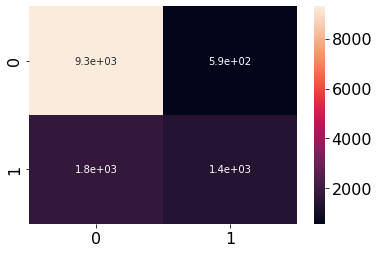

In [101]:
sns.heatmap(cnf_matrix, annot=True)
plt.show()

In [102]:
from sklearn.metrics import f1_score
f1_score(y_test, pred_lg)

0.5476923076923077

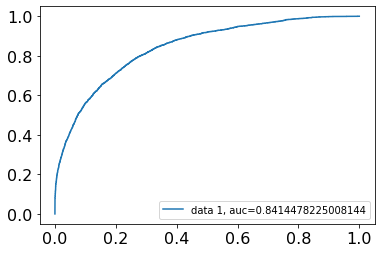

In [103]:
y_pred_proba = log_r.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

# 2. Decision Tree Classifier

In [104]:
# import decision tree model from sklearn
from sklearn.tree import DecisionTreeClassifier

In [105]:
dtr=DecisionTreeClassifier()

In [106]:
dtr.fit(X_train, y_train)

DecisionTreeClassifier()

In [107]:
Predictions = dtr.predict(X_train)
metrics.accuracy_score(y_train,Predictions)

0.9999343875073814

In [108]:
Predictions1 = dtr.predict(X_test)

In [110]:
print("Accuracy:",metrics.accuracy_score(y_test, Predictions1)*100)
print("Precision:",metrics.precision_score(y_test, Predictions1))
print("Recall:",metrics.recall_score(y_test, Predictions1))

Accuracy: 80.17452541334966
Precision: 0.5897129186602871
Recall: 0.6181818181818182


In [111]:
f1_score(y_test, Predictions1)

0.6036118763391491

# 3. K Nearest Neighbour

In [116]:
from sklearn.neighbors import KNeighborsClassifier

In [118]:
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [119]:
pred_knn = knn.predict(X_train)
metrics.accuracy_score(y_train,pred_knn)

0.8812413883603438

In [120]:
pred_knn1 = knn.predict(X_test)

In [121]:
print("Accuracy:",metrics.accuracy_score(y_test, pred_knn1))
print("Precision:",metrics.precision_score(y_test, pred_knn1))
print("Recall:",metrics.recall_score(y_test,pred_knn1))

Accuracy: 0.8276178812002449
Precision: 0.6658415841584159
Recall: 0.590282131661442


In [122]:
f1_score(y_test, pred_knn1)

0.6257892987703556

# 4.Support Vector Machine

In [123]:
from sklearn.svm import SVC

In [124]:
model_SVM = SVC()
model_SVM.fit(X_train,y_train)

SVC()

In [126]:
pred_svm = model_SVM.predict(X_train)
metrics.accuracy_score(y_train,pred_svm)

0.7604159832032019

In [127]:
pred_svm1 = model_SVM.predict(X_test)

In [128]:
print("Accuracy:",metrics.accuracy_score(y_test, pred_svm1))
print("Precision:",metrics.precision_score(y_test, pred_svm1))
print("Recall:",metrics.recall_score(y_test, pred_svm1))

Accuracy: 0.7581139007960809
Precision: 1.0
Recall: 0.009404388714733543


In [129]:
f1_score(y_test, pred_svm1)

0.018633540372670808

# Ensemble Models
# 5. Bagging Classifier

In [130]:
from sklearn.ensemble import BaggingClassifier

In [131]:
bagging = BaggingClassifier()
bagging.fit(X_train,y_train)

BaggingClassifier()

In [132]:
pred_bagg = bagging.predict(X_train)
metrics.accuracy_score(y_train,pred_bagg)

0.9871727576930648

In [133]:
pred_bagg1 = bagging.predict(X_test)

In [134]:
print("Accuracy:",metrics.accuracy_score(y_test, pred_bagg1))
print("Precision:",metrics.precision_score(y_test, pred_bagg1))
print("Recall:",metrics.recall_score(y_test, pred_bagg1))

Accuracy: 0.8393294549908145
Precision: 0.7133359405553383
Recall: 0.5717868338557994


# 6. Random Forest Classifier

In [135]:
from sklearn.ensemble import RandomForestClassifier

In [136]:
rfc = RandomForestClassifier(n_estimators=30)
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=30)

In [137]:
rfc_pred = rfc.predict(X_train)
metrics.accuracy_score(y_train,rfc_pred)

0.9979332064825143

In [138]:
rfc_pred1 = rfc.predict(X_test)

In [139]:
print("Accuracy:",metrics.accuracy_score(y_test, rfc_pred1))
print("Precision:",metrics.precision_score(y_test, rfc_pred1))
print("Recall:",metrics.recall_score(y_test, rfc_pred1))

Accuracy: 0.8506582976117575
Precision: 0.7340385341896487
Recall: 0.6090909090909091


# 7. AdaBoost Classifier

In [140]:
from sklearn.ensemble import AdaBoostClassifier

In [141]:
AdaBoost = AdaBoostClassifier()
AdaBoost.fit(X_train,y_train)

AdaBoostClassifier()

In [142]:
AdaBoost.score(X_train, y_train)

0.8535529164752969

In [143]:
pred_Adaboost = AdaBoost.predict(X_train)
metrics.accuracy_score(y_train,pred_Adaboost)

0.8535529164752969

In [144]:
pred_Adaboost1 = AdaBoost.predict(X_test)

In [145]:
print("Accuracy:",metrics.accuracll: 0.5974921630094044y_score(y_test, pred_Adaboost1 ))
print("Precision:",metrics.precision_score(y_test,pred_Adaboost1 ))
print("Recall:",metrics.recall_score(y_test, pred_Adaboost1 ))

Accuracy: 0.8571647274954072
Precision: 0.7660771704180064
Recall: 0.5974921630094044


# 8.Gradient Boosting Classifier

In [146]:
from sklearn.ensemble import GradientBoostingClassifier

In [147]:
GBC = GradientBoostingClassifier()
GBC.fit(X_train,y_train)

GradientBoostingClassifier()

In [148]:
GBC.score(X_train, y_train)

0.8628042779345187

In [149]:
pred_gradient1 = GBC.predict(X_test)

In [150]:
print("Accuracy:",metrics.accuracy_score(y_test,pred_gradient1))
print("Precision:",metrics.precision_score(y_test, pred_gradient1))
print("Recall:",metrics.recall_score(y_test,pred_gradient1))

Accuracy: 0.8621402327005512
Precision: 0.7907074089577228
Recall: 0.5921630094043887


# 9. XgBoost Classifier

In [151]:
from xgboost import XGBClassifier

In [152]:
model_xg = XGBClassifier()
model_xg.fit(X_train,y_train)

XGBClassifier()

In [153]:
#Prediction and Accuracy
pred_xg = model_xg.predict(X_train)
metrics.accuracy_score(y_train,pred_xg)

0.8615576405747655

In [154]:
#Prediction and Accuracy
pred_xg1 = model_xg.predict(X_test)

In [155]:
print("Accuracy:",metrics.accuracy_score(y_test, pred_xg1))
print("Precision:",metrics.precision_score(y_test, pred_xg1))
print("Recall:",metrics.recall_score(y_test,pred_xg1))

Accuracy: 0.8613747703612982
Precision: 0.7893411665967268
Recall: 0.5896551724137931


#### hence Gradient Boosting Classifier works well for this problem with low error and got 86% accuracy 